<a href="https://colab.research.google.com/github/f4ieh/object_detection/blob/main/object_detection_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Détection d'objets </h1>
<h2 style = "text-align:center" > Open-Images et fine-tuning </h2>
<hr style="border-width:2px;border-color:#75DFC1">

> Les exercices précédents étaient destinés à présenter le fonctionnement de quelques modèles d'objet détection, ainsi que l'inférence d'un modèle de détection d'objet. Intéressons nous maintenant à un vrai jeu de données de détection d'objets, ainsi que l'entraînement d'un modèle pré-entraîné.
>
> La thématique sera la détection des personnes ainsi que leur visage.
>
><img src="https://assets-datascientest.s3.eu-west-1.amazonaws.com/notebooks/object_detection_sample_pred.png" style="height:500px">

### Structure de l'exercice

>**1. Chargement des données** : utilisation de l'API fiftyone, exportation des données, format CoCo.
>
>
>**2. Préparation des données** : transformer et normaliser les données pour les modèles de tensorflow, générateur de données personnalisé.
>
>
> **3. Modélisation** : Importer et configurer un modèle de l'API de détection d'objets de tensorflow, Fine tune, évaluation du modèle.

### Utiliser une marchine avec GPU

>* Aller dans Edit/Notebook setting.
>
><img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/colab_gpu_01.png'>
>
> * Vous pouvez ensuite choisir si vous désirez utiliser un GPU. Appuyer sur `SAVE` pour valider votre choix.
>
><img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/colab_gpu_02.png'>
>
> Attention vous allez être basculer sur une nouvelle machine, et vous ne pouvez pas dépasser 12h/jour d'utilisation.

⚠ ⚠ ⚠ ```
Attention les cellules suivantes peuvent prendre quelques minutes pour s'exécuter. Et, activer bien 
``` ⚠ ⚠ ⚠

* **(a)** Exécuter les cellules suivantes pour installer les packages nécessaires.

In [1]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 75999, done.
remote: Counting objects: 100% (461/461), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 75999 (delta 251), reused 395 (delta 206), pack-reused 75538
Receiving objects: 100% (75999/75999), 589.50 MiB | 21.98 MiB/s, done.
Resolving deltas: 100% (53884/53884), done.


In [2]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1694955 sha256=401724bd28cd05017364fce0f304386c9841f0ae16cb4099892db05b83802748
  Stored in directory: /tmp/pip-ephem-wheel-cache-_uj94652/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=fc170496bdad1d7bc1a4034be24c83a29867d62f60868145e084a387f0e1fd43
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=f93205681a37baebe89b371f4ddc4ce28dd3f68156ca14b37929915ab25f22ad
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_p

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.


In [ ]:
# Install right version tensorflow and fiftyone
!pip install tensorflow==2.7.0
!pip install opencv-python-headless==4.5.4.60 fiftyone
!pip install fiftyone --no-binary fiftyone,voxel51-eta
# Restart the runtime
import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 24 kB/s 
     |████████████████████████████████| 463 kB 9.7 MB/s 
     |████████████████████████████████| 1.3 MB 54.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.9.2 requ

⚠ ⚠ ⚠ ```
Attention, comme une réinitialisation du kernel est faite, il est nécessaire d'attendre l'execution avant de lancer une autre cellule de code.
``` ⚠ ⚠ ⚠


<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > 1. Chargement des données </h2>
<hr style="border-width:2px;border-color:#75DFC1">

## Jeu de données Open-Image

> Pour rappel, [Open Images](https://storage.googleapis.com/openimages/web/index.html) comporte 8M d'images de toutes sortes avec les annotations de l'emplacement des objets. Des informations sur la segmentation sont également présentes pour une partie d'entre elles.
>
> Les auteurs du jeu de données mettent à disposition une API **[fiftyone](http://fiftyone.ai/)** ainsi qu'un outil avancé de visualisation.
>
> La fonction `load_zoo_dataset` de **`fiftyone.zoo`** ne contient pas que le jeu de données 'open-images-v6'.Il permet aussi de récupérer et piocher dans les jeux de données les plus célèbre.

* **(b)** Exécuter la cellule suivante pour afficher les jeux de données disponibles depuis l'API.

In [1]:
import fiftyone.zoo as foz
# List available zoo datasets
print(foz.list_zoo_datasets())

NumExpr defaulting to 2 threads.


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Migrating database to v0.16.5
['activitynet-100', 'activitynet-200', 'bdd100k', 'caltech101', 'caltech256', 'cifar10', 'cifar100', 'cityscapes', 'coco-2014', 'coco-2017', 'fashion-mnist', 'fiw', 'hmdb51', 'imagenet-2012', 'imagenet-sample', 'kinetics-400', 'kinetics-600', 'kinetics-700', 'kinetics-700-2020', 'kitti', 'lfw', 'mnist', 'open-images-v6', 'quickstart', 'quickstart-geo', 'quickstart-video', 'ucf101', 'voc-2007', 'voc-2012']


> La fonction `load_zoo_dataset` permet alors :
>
> * **Sélectionner votre jeu de données** parmis la liste précédement affichée.
>
>
> * Choisir le **split du jeu de données** : {'train', 'test', 'validation}
>
>
> * Choisir le **type de label souhaité** : {'classifications', 'detections', 'relationships', 'segmentations'}
>
>
> * Choisir les **classes d'objets** que contiennent les images (chat, chien...). L'[outil d'exploration](https://storage.googleapis.com/openimages/web/visualizer/index.html?set=train&type=detection&c=%2Fm%2F02p0tk3) d'open-image permet de se faire une idée.
>
>
> * **Limiter le nombre d'échantillon** à charger.
>
>
> ```python
>dataset = fiftyone.zoo.load_zoo_dataset(
              "open-images-v6",                           # Name of dataset
              split="validation",                         # Split of the dataset
              label_types=["detections", "segmentations"], # label types
              classes=["Cat", "Dog"],       # Classe of objects
              max_samples=100,                            # Max smaples
              drop_existing_dataset=True                  # Drop the name of existing dataset
          )
>```

* **(c)** Charger sous le nom **`dataset`** un jeu de données provenant de **`'open-images-v6'`**, sur le split **`'validation'`**, avec uniquement le label **`'detections'`**, sur les classes **`["Human head", "Human body"]`**, avec une limite de **`1000`** de samples, et **enlever les datasets existants**.

In [2]:
import fiftyone
# Insérer votre code ici



In [58]:
import fiftyone


# Load the COCO-2017 validation split into a FiftyOne dataset
dataset = fiftyone.zoo.load_zoo_dataset(
              "open-images-v6",                           # Name of dataset
              split="validation",                         # Split of the dataset
              label_types=["detections"],# label types
              classes=["Football helmet"],                     # Classe of objects , "Human body"
              max_samples=1000,                            # Max smaples
              drop_existing_dataset=True                  # Drop the name of existing dataset
          )

Only found 52 (<1000) samples matching your requirements
Found 33 images, downloading the remaining 19
 100% |█████████████████████| 19/19 [2.6s elapsed, 0s remaining, 9.5 files/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Deleting existing dataset 'open-images-v6-validation-1000'
Loading 'open-images-v6' split 'validation'
 100% |███████████████████| 52/52 [1.7s elapsed, 0s remaining, 30.6 samples/s]          
Dataset 'open-images-v6-validation-1000' created


> Un dataset provenant de fiftyone est composé de `Sample` : chacun correspond à une image ainsi que les informations sur l'annotation.
>
> Il est possible d'itérer pour les récupérer : 
>
> ```python
>for sample in dataset :
>    [...]
>```
>
>Il existe aussi la méthode `first` permettant de récupérer le premier `Sample` du jeu de données.

* **(d)** Afficher le premier Sample du jeu de données **`dataset`**.

In [4]:
# Insérer votre code ici



In [5]:
dataset.first()

<Sample: {
    'id': '62ed1ad617de98db647b4809',
    'media_type': 'image',
    'filepath': '/root/fiftyone/open-images-v6/validation/data/0177ba1593d54279.jpg',
    'tags': BaseList(['validation']),
    'metadata': None,
    'detections': <Detections: {
        'detections': BaseList([
            <Detection: {
                'id': '62ed1ad617de98db647b47ff',
                'attributes': BaseDict({}),
                'tags': BaseList([]),
                'label': 'Person',
                'bounding_box': BaseList([0.0, 0.0, 0.9572271, 0.8141593]),
                'mask': None,
                'confidence': None,
                'index': None,
                'IsOccluded': False,
                'IsTruncated': True,
                'IsGroupOf': False,
                'IsDepiction': False,
                'IsInside': False,
            }>,
            <Detection: {
                'id': '62ed1ad617de98db647b4800',
                'attributes': BaseDict({}),
                'tags': Bas

> Les objets `Sample` peuvent être manipulés comme des dictionnaires. Il est alors facile de récupérer le chemin vers l'image ainsi que les objets labélisés.
>
>
> Ce format de données est particulié à l'API **`fiftyone`**, c'est pourquoi nous allons choisir ici de les convertir en **format CoCo**, le format le plus couramment utilisé pour stocker les labels en détection d'objets.
>
> Pour cela, la méthode `export` de l'objet **`dataset`** exporte les images ainsi que stocke la labélisation dans un fichier json.
>
>```python
>dataset.export(
>    export_dir=folder_export, # Folder export data
>    dataset_type=fiftyone.types.COCODetectionDataset # Format of label file
>)
>```
> Les données seront exportées dans le folder_export sous la structure suivante : 
>
>```
│─── folder_export
│   └───data
│       │   7166544280_9d975c4d9a_n.jpg
│       │   6958243974_8851425ddb_n.jpg
│       │   8729501081_b993185542_m.jpg
│       │    ...
│   └───labels.csv
>```

* **(e)** Exécuter la cellule suivante pour exporter les données dans le dossier *dataset_train*.

In [59]:
import os
folder_data = "./dataset_train/"
# Export data to CoCo format
dataset.export(
    export_dir=folder_data,
    dataset_type=fiftyone.types.COCODetectionDataset
)
# Show elements in the folder data
os.listdir(folder_data)

Directory './dataset_train/' already exists; export will be merged with existing files
 100% |███████████████████| 52/52 [834.2ms elapsed, 0s remaining, 62.3 samples/s]      


['labels.json', 'data']

### Données format COCO

> Les données sous format COCO sont stockées dans un format **`json`**, autrement dit sous format d'un dictionnaire. Le dictionnaire est composé des clés suivantes :


In [60]:
import json
with open( folder_data+"/labels.json" , "r" ) as f: 
    data = json.load(f)
    
data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

> Avec **`info`**, correspondant aux informations sur le jeu de données (date de création, auteur, version, description...).

In [8]:
data['info']

{'contributor': '',
 'date_created': '2022-08-05T13:28:31',
 'description': 'Exported from FiftyOne',
 'url': 'https://voxel51.com/fiftyone',
 'version': '',
 'year': ''}

> **`licenses`** : informations sur la licence.

In [9]:
data['licenses']

[]

>**`categories`** : relation entre index de classes et le nom de classes.

In [67]:
data["categories"][:]

[{'id': 0, 'name': 'Ball', 'supercategory': None},
 {'id': 1, 'name': 'Baseball bat', 'supercategory': None},
 {'id': 2, 'name': 'Baseball glove', 'supercategory': None},
 {'id': 3, 'name': 'Bicycle helmet', 'supercategory': None},
 {'id': 4, 'name': 'Boy', 'supercategory': None},
 {'id': 5, 'name': 'Clothing', 'supercategory': None},
 {'id': 6, 'name': 'Fashion accessory', 'supercategory': None},
 {'id': 7, 'name': 'Football', 'supercategory': None},
 {'id': 8, 'name': 'Football helmet', 'supercategory': None},
 {'id': 9, 'name': 'Footwear', 'supercategory': None},
 {'id': 10, 'name': 'Girl', 'supercategory': None},
 {'id': 11, 'name': 'Glove', 'supercategory': None},
 {'id': 12, 'name': 'Helmet', 'supercategory': None},
 {'id': 13, 'name': 'Human arm', 'supercategory': None},
 {'id': 14, 'name': 'Human body', 'supercategory': None},
 {'id': 15, 'name': 'Human eye', 'supercategory': None},
 {'id': 16, 'name': 'Human face', 'supercategory': None},
 {'id': 17, 'name': 'Human hair', 'sup

>**`images`** : Informations sur chaque image du jeu de données (nom de l'image, description, indice de l'image...)

In [61]:
data["images"][:3]

[{'coco_url': None,
  'file_name': '0177ba1593d54279-2.jpg',
  'height': 683,
  'id': 1,
  'license': None,
  'width': 1024},
 {'coco_url': None,
  'file_name': '020c7b8e6d605069-2.jpg',
  'height': 683,
  'id': 2,
  'license': None,
  'width': 1024},
 {'coco_url': None,
  'file_name': '06ab03d651ae501b-2.jpg',
  'height': 762,
  'id': 3,
  'license': None,
  'width': 1024}]

>* **`annotations`** : Liste d'objets annotés



In [62]:
data["annotations"][:2]

[{'IsDepiction': False,
  'IsGroupOf': False,
  'IsInside': False,
  'IsOccluded': False,
  'IsTruncated': True,
  'area': 545060.9060837494,
  'bbox': [0.0, 0.0, 980.2005504, 556.0708019],
  'category_id': 25,
  'id': 1,
  'image_id': 1,
  'iscrowd': 0},
 {'IsDepiction': False,
  'IsGroupOf': False,
  'IsInside': False,
  'IsOccluded': False,
  'IsTruncated': True,
  'area': 337449.75281044684,
  'bbox': [0.0, 92.17477725, 780.8377856, 432.16370804999997],
  'category_id': 5,
  'id': 2,
  'image_id': 1,
  'iscrowd': 0}]

> Maintenant que les données ont été exportées, préparons les.

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > 2. Préparation des données </h2>
<hr style="border-width:2px;border-color:#75DFC1">

> Pour faliciter la manipulation des données, nous allons convertir le dictionnaire "annotations" ainsi que "images" dans un dataframe **`pandas`**.

* **(a)** Exécuter la cellule suivante pour les convertir ainsi que fusionner les deux dataframes.

In [63]:
import pandas as pd
df = pd.DataFrame(data["annotations"])
df_im = pd.DataFrame(data['images'])
df = pd.merge(df_im, df, left_on="id", right_on="image_id")
df

id_x               file_name  height  width license coco_url  id_y  \
0        1  0177ba1593d54279-2.jpg     683   1024    None     None     1   
1        1  0177ba1593d54279-2.jpg     683   1024    None     None     2   
2        1  0177ba1593d54279-2.jpg     683   1024    None     None     3   
3        1  0177ba1593d54279-2.jpg     683   1024    None     None     4   
4        1  0177ba1593d54279-2.jpg     683   1024    None     None     5   
...    ...                     ...     ...    ...     ...      ...   ...   
1450    52    fc14f1cce131d551.jpg     917   1024    None     None  1451   
1451    52    fc14f1cce131d551.jpg     917   1024    None     None  1452   
1452    52    fc14f1cce131d551.jpg     917   1024    None     None  1453   
1453    52    fc14f1cce131d551.jpg     917   1024    None     None  1454   
1454    52    fc14f1cce131d551.jpg     917   1024    None     None  1455   

      image_id  category_id  \
0            1           25   
1            1            5   
2            1           29   
3            1           23   
4            1           23   
...        ...          ...   
1450        52            4   
1451        52            4   
1452        52            8   
1453        52            8   
1454        52            8   

                                                   bbox           area  \
0                  [0.0, 0.0, 980.2005504, 556.0708019]  545060.906084   
1     [0.0, 92.17477725, 780.8377856, 432.1637080499...  337449.752810   
2         [0.0, 92.17477725, 980.2005504, 426.11947223]  417682.541216   
3                  [0.0, 0.0, 978.6902528, 556.0708019]  544221.073686   
4        [212.9557504, 0.0, 273.36873984, 42.309734066]   11566.158685   
...                                                 ...            ...   
1450  [204.8, 224.00000077, 409.59999999999997, 642....  263065.603985   
1451  [668.663296, 57.750000699999994, 213.55209728,...  121831.470601   
1452  [164.54018048, 217.00000791, 92.77265920000002...    9578.776225   
1453  [273.06668032, 224.00000077, 133.0324684800000...   17693.318559   
1454  [752.683776, 57.750000699999994, 106.776064000...   13453.784049   

      iscrowd  IsGroupOf  IsOccluded  IsTruncated  IsDepiction  IsInside  
0           0      False       False         True        False     False  
1           0      False       False         True        False     False  
2           0      False        True         True        False     False  
3           0      False        True         True        False     False  
4           0      False        True         True        False     False  
...       ...        ...         ...          ...          ...       ...  
1450        0      False       False        False        False     False  
1451        0      False       False        False        False     False  
1452        0      False       False        False        False     False  
1453        0      False       False        False        False     False  
1454        0      False       False        False        False     False  

[1455 rows x 17 columns]

> Voici un tableau avec signification des colones les plus importantes : 
>
>|Variable | Description |
| ----- | ----- |
| **id_x** ou **image_id** | Identifiant de l'image|
| **file_name** | Nom de l'image |
| **height** | Hauteur en pixel de l'image |
| **width** | Largeur en pixel de l'image |
| **id_y** | Identification de l'objet |
| **category_id** | Catégorie de l'objet (voiture, avion, personne...) |
| **bbox** | Coordonnées $x_{min}$, $y_{min}$, $w$ et $h$ non normalisées |
>
> En effet, dans le format CoCo, la colonne **`bbox`** correspond aux coordonnées $x_{min}$, $y_{min}$, $w$ et $h$ non normalisées, c'est-à-dire dans l'echelle des pixels.
>
> <img src='https://assets-datascientest.s3.eu-west-1.amazonaws.com/notebooks/object_detection_coord_coco.png' style='width:300px'>
><center> <b> Figure :</b> Format des annotations sur CoCo </center>
><br></br>
>
> Alors que le format demandé par les modèles de tensorflow est le suivant : $y_{min}$, $x_{min}$, $y_{max}$ et $x_{max}$ normalisés.
>
>
>
> <img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/object_detection_coord_min_max.png' style='width:300px'>
>
><center> <b> Figure :</b> Format des annotations sur Tensorflow </center>
><br></br>

* **(b)** Exécuter la cellule suivante pour convertir et normaliser la colonne **bbox**.

In [64]:
def convertWHXY_normalized(x):
    bbox = x['bbox']
    w = x['width']
    h = x['height']
    return [bbox[1]/h, bbox[0]/w, (bbox[1]+bbox[3])/h, (bbox[0]+bbox[2])/w]

df['bbox_normilized'] = df[["height", "width", "bbox"]].apply(convertWHXY_normalized, axis=1)

## Catégorie d'objet

> Analysons maintenant les catégories disponibles dans notre jeu de données.

* **(c)** Afficher le nombre de catégories d'objets différents.

In [15]:
# Insérer votre code ici



In [65]:
df.category_id.value_counts()

28    305
8     223
9     210
23    206
5     176
24     66
25     53
19     39
13     26
14     24
12     19
22     19
20     16
16     13
29     11
15      9
4       7
0       5
2       5
18      4
21      4
17      3
1       3
26      2
11      2
27      1
10      1
6       1
3       1
7       1
Name: category_id, dtype: int64

* **(d)** D'après le dictionnaire de correspondance **`data['categories']`**, afficher le TOP10 des **noms d'objet** les plus présents.

In [17]:
# Insérer votre code ici



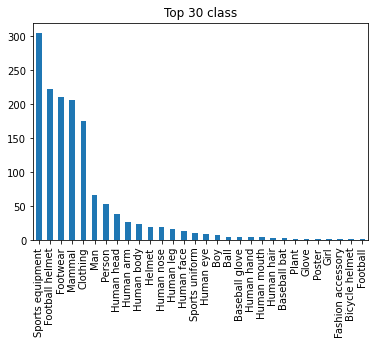

In [66]:
import matplotlib.pyplot as plt
df['category_name'] = df['category_id'].apply(lambda x : data['categories'][x]['name'] )
df['category_name'].value_counts()[:30].plot.bar()
plt.title('Top 30 class')
plt.show()

> Ici, nous allons faire le choix de nous intéresser qu'aux objets "Human body" (id:261) et "Humain head" (id:268).

* **(e)** Exécuter la cellule suivante pour selectioner uniquement ces deux objets, et les remplacer sous l'indice 0 et 1.

In [68]:

df = df[df.category_id.isin([25, 8])]
df.category_id = df.category_id.replace([25, 8], [0, 1])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


> Dans l'état actuel, chaque observation correspond à une annotation. Dans la suite, nous allons avoir besoin d'aller dans la maille des images (une observation correpond aux informations d'une image).

* **(f)** Exécuter la cellule suivante pour aggréger les données dans la maille des images.

In [69]:
df_group = df.groupby("id_x").agg({"file_name":"min", "image_id":"count", "height":"min", "width":"min", "bbox_normilized":list, "category_id":list})
df_group

file_name  image_id  height  width  \
id_x                                                    
1     0177ba1593d54279-2.jpg         3     683   1024   
2     020c7b8e6d605069-2.jpg         1     683   1024   
3     06ab03d651ae501b-2.jpg         2     762   1024   
4     09bd44f48b4e13ed-2.jpg         1     768   1024   
5     226f0a1873b9bf8e-2.jpg         2     859   1024   
6     2e3725061b70a037-2.jpg         3     680   1024   
7       2e73122ed9f766f7.jpg         1     768   1024   
8       34b4b1e00c8e05ce.jpg         1    1024    678   
9     34ecc9a0dc5e9f8d-2.jpg         2    1024    768   
10      3c06d149c8027e71.jpg         1    1024    683   
11    3dfb69ce87aeb5a9-2.jpg        25     768   1024   
12      4499f0a7ccea3a55.jpg         1     683   1024   
13    4d65679e6972e53e-2.jpg         7     683   1024   
14    5014cc45d81322b8-2.jpg         2     768   1024   
15      52b0df2caccca079.jpg         1     683   1024   
16    54b036d14624ffeb-2.jpg         2     678   1024   
17    5c0479db513621e8-2.jpg         4     680   1024   
18    5d8c99f560208989-2.jpg         9     683   1024   
19    676c54a1d28fb4d9-2.jpg         3     681   1024   
20    67f3a1940a5c23b2-2.jpg        43     768   1024   
21    703f91707007c0bc-2.jpg         2     683   1024   
22      7d9a7e679b39765c.jpg         3    1024    819   
23    7dff7d6d46105f4e-2.jpg         5    1024    792   
24      7f766475c3514c77.jpg         4     684   1024   
25    83e734d9c556c49a-2.jpg         2     683   1024   
26    8c441816f66c14db-2.jpg        18     716   1024   
27      8c676b9db5bde9f4.jpg         1     683   1024   
28    8f7cf3384dd9bcb7-2.jpg         4     627   1024   
29    9ebaf21ed8d77e95-2.jpg         5     576   1024   
30    a07334eca5e4b0cf-2.jpg        30     522   1024   
31    a144cb066f688185-2.jpg         5     690   1024   
32      a7c85e8c96ed4128.jpg         7     682   1024   
33    ae387da9890adf09-2.jpg         7     878   1024   
34    b0b68476c11e9d03-2.jpg         4    1024    964   
35      b1bb21ee376d5b47.jpg         1     996   1024   
36    b205acb74d49f403-2.jpg         5    1024    732   
37      b41ee1d8106c63df.jpg         1     683   1024   
38      b4664f9e115b988d.jpg         1    1024    768   
39      b49472420023ed57.jpg         1     680   1024   
40    b57f8c2cb2244b3b-2.jpg         2    1024    706   
41      b5b3e52f596bd5a1.jpg         3     764   1024   
42    bac682026bdd3528-2.jpg        20     768   1024   
43    bcd967369f635460-2.jpg         4     681   1024   
44      be0eddd107c6497d.jpg         1     683   1024   
45      c4a79ad7987f24b9.jpg         3    1024    682   
46    dbf60b8984b89eae-2.jpg         4     682   1024   
47    e9bc1997ed2f64cf-2.jpg         2     683   1024   
48      e9d00fd284184ce3.jpg         1     819   1024   
49      efab48b15a243f31.jpg         1     761   1024   
50    f001554921abd6af-2.jpg         4     768    858   
51    f630e37430b6b139-2.jpg         8    1024    850   
52      fc14f1cce131d551.jpg         3     917   1024   

                                        bbox_normilized  \
id_x                                                      
1     [[0.0, 0.0, 0.8141593, 0.9572271], [0.0, 0.050...   
2        [[0.23893805000000004, 0.069321536, 1.0, 1.0]]   
3     [[0.046025105, 0.38161993, 0.22803347, 0.47352...   
4     [[0.08958333, 0.1546875, 0.9499999999999998, 0...   
5     [[0.15581854, 0.8165289, 0.40433925, 0.9206611...   
6     [[0.19058824, 0.0, 1.0, 0.975], [0.69411767, 0...   
7       [[0.16666667, 0.1890625, 0.9291667, 0.7640625]]   
8     [[0.29515418, 0.3991131, 0.42584434, 0.59645236]]   
9     [[0.2984375, 0.90416664, 0.4859375, 0.9479167]...   
10    [[0.30973452, 0.40044247999999993, 0.5265487, ...   
11    [[0.0, 0.0, 1.0, 1.0], [0.8979167, 0.0046875, ...   
12    [[0.07964602, 0.3038348, 0.28318584, 0.44100294]]   
13    [[0.0, 0.0, 0.98893803, 0.7640118], [0.5442478...   
14    [[0.0, 0.0, 1.0, 1.0], [0.42, 0.66, 0.62333333...

* **(g)** Exécuter la cellule suivante pour afficher une des images annontées.

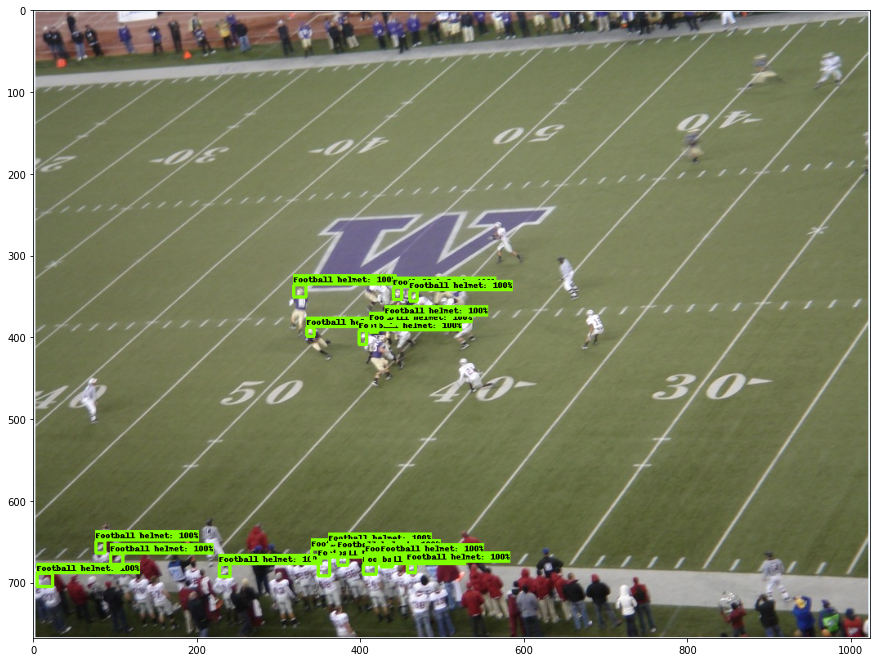

In [71]:
%matplotlib inline
from object_detection.utils import visualization_utils as viz_utils
import matplotlib.pyplot as plt
from object_detection.utils import label_map_util
import numpy as np
import cv2

# Define relation index/name object
category_index = {0: {'id': 0, 'name': 'Person'}, 1: {'id': 1, 'name': 'Football helmet'}}
# category_index = dict(list(zip(list(map(lambda x : x['id'], data['categories'])), data['categories'])))

# Select a observation
idx = 10
observation = df_group.iloc[idx]

# Load the image and convert it into RGB
img = cv2.imread(folder_data+"data/"+observation["file_name"])[..., ::-1]


# Overwrite the image to add annotation
image_np_with_detections = img.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      np.array(observation["bbox_normilized"]),
      np.array(observation["category_id"]),
      np.ones(len(observation["category_id"])),
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=.30)

# Show image annoted
plt.figure(figsize=(15,20))
plt.imshow(image_np_with_detections)
plt.show()

> Le modèle de détection d'objets que nous allons charger/fine tune provient de l'API de tensorflow. La liste des modèles disponibles est disponible à partir ce [lien](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md).
>
> Hélas, ce type de modèle **n'est pas doté** de méthode d'entraînement `fit` ou `fit_generator`. Il sera alors nécessaire de recourir aux boucles d'entraînement personnalisées.
>
> Le modèle aura besoin pour s'entraîner :
>
> * D'un **batch d'images** de forme : [nb_elements, dim_x, dim_y, 3]
>
>
>* De la liste des **coordonnées de chaque objet** :
>
> ```python
>[
> # First image
> [[0.14961833, 0.30982906, 0.7969466, 0.6880342], # coordinate object
>  [0.1480916, 0.3974, 0.31603053, 0.5811966]], # coordinate object
> # Seconde image
> [[0.16666667, 0.0, 1.0, 0.178125], # coordinate object
>  [0.34791, 0.13125, 0.87916666, 0.7515625], # coordinate object
>  [0.31666666, 0.5890625, 0.5229167, 0.740625]] # coordinate object
>...
>]
>```
>
>
> * De la liste des **classes de chaque objets** sous format one hot  :
>
> ```python
>[
> # First image
> [[1.0, 0.0], # class object
>  [0.0, 1.0]], # class object
> # Seconde image
> [[1.0, 0.0], # class object
>  [1.0, 0.0], # class object
>  [0.0, 1.0]] # class object
>...
>]
>```
>
> Comme la forme d'entrée peut varier en fonction du nombre d'objet par image, rendant les datasets de tensorflow plus difficile d'utilisation, nous allons faire le choix de définir un générateur personnalisé.

* **(h)** Exécuter la cellule suivante pour définir notre générateur.

In [101]:
import tensorflow as tf


import numpy as np

class DataGenerator(tf.keras.utils.Sequence):
    
    def __init__(self, df,
                 batch_size,
                 folder_image,
                 nb_class = 2,
                 input_size=(128, 128, 3),
                 shuffle=True):
        
        self.df = df.copy()
        self.batch_size = batch_size
        self.folder_image = folder_image
        self.nb_class = nb_class
        self.input_size = input_size
        self.shuffle = shuffle
        self.n = len(self.df)
        
    
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1)
    
    def __get_input(self, path, target_size):
        # Load the image
        image = tf.keras.preprocessing.image.load_img(self.folder_image + path)
        # Convert to array
        image_arr = tf.keras.preprocessing.image.img_to_array(image)
        # resize it
        image_arr = tf.image.resize(image_arr, (target_size[0], target_size[1])).numpy()
        
        return image_arr
    
    def __get_output(self, label, num_classes):
        return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    

    def __getitem__(self, index):
        # Select the batch of data
        batches = self.df.iloc[index * self.batch_size: (index + 1) * self.batch_size]

        X_batch = []
        # Load images  
        for path in batches["file_name"] :
            im = self.__get_input(path, target_size=self.input_size)
            X_batch.append(im)

        # Coordinate label
        gt_box_tensors =[gt_box_np for gt_box_np in batches['bbox_normilized']]

        # Class Label
        gt_classes_one_hot_tensors = [tf.one_hot(gt_label_np, self.nb_class).numpy() for gt_label_np in batches['category_id']]
    
        return np.array(X_batch), gt_box_tensors, gt_classes_one_hot_tensors
    
    def __len__(self):
        return self.n // self.batch_size
    
batch_size = 8
dataTrain = DataGenerator(df_group, batch_size=batch_size, folder_image=folder_data+"data/")

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > 3. Modélisation </h2>
<hr style="border-width:2px;border-color:#75DFC1">


> Pour rappel, l'API de tensorflow propose une liste exhaustive de modèles pré-entraînés : https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
>
>
> <img src='https://assets-datascientest.s3.eu-west-1.amazonaws.com/notebooks/object_detection_dl_model.png' style='width:300px'>
><center> <b> Figure :</b> Liste des modèles disponibles sur l'<a href="https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md"> API de tensorflow</a> </center>
>
>
> Les colonnes du tableau correspondent : 
>
> * **Model name** : Indicant le type de modèles utilisés (Yolo, R-CNN, SSD...), le backbone utilisé et la taille d'entrée des données. Le lien permet de télécharger le modèle.
>
> * **Speed** : Vitesse d'inférence sur une machine spécifique.
>
>
>* **COCO mAP** : Performance du modèle sur le jeu de donnée COCO.
>
>
>* **Outputs** : Type de prédiction du modèle.
>
>
> Pour utiliser le modèle, il sera nécessaire de mettre le checkpoint du modèle dans le dossier *models/research/object_detection/test_data*.

* **(a)** Exécuter la cellule suivante pour télécharger un des modèles, décompresser et placer le checkpoint dans le bon dossier.

In [102]:
# Download the checkpoint and put it into models/research/object_detection/test_data/
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

--2022-08-05 15:03:30--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.142.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz.1’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   185MB/s    in 1.3s    

2022-08-05 15:03:31 (185 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz.1’ saved [244817203/244817203]

mv: cannot move 'ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint' to 'models/research/object_detection/test_data/checkpoint': Directory not empty


> Pour facilité l'utisation des modèles, l'api de détection d'objet de tensorflow utilise des **pipelines** contenant : le **prétraitement des données**, un système d'**augmenatation de données**, le **modèle** et les **fonctions de pertes**, ainsi que le **post traitement** avec la non max suppression.
>
> Les configurations des modèles se trouvent dans le dossier "models/research/object_detection/configs/tf2/".

* **(b)** Exécuter la cellule suivante pour charger le fichier config de notre modèle téléchagé plus haut.

In [103]:
from object_detection.utils import config_util
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
# Load the config model, and override it to adapt it on the case
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
configs

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED/label_map.txt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED/val2017-?????-of-00032.tfrecord"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED/label_map.txt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED/val2017-?????-of-00032.tfrecord"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_resnet50_v1_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 0.00039999998989515007
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
   

> Il est très facile de changer le fichier config pour l'adapter à notre tâche.

* **(c)** Exécuter la cellule suivante pour changer quelques éléments dans le dictionnaire de config.

In [104]:
num_classes = 2

# Override it to adapt it on the case
model_config = configs['model']
# Override the numbrer of class
model_config.ssd.num_classes = num_classes
# Freeze the batchnorm layer in fine tuning.
model_config.ssd.freeze_batchnorm = True

> La fonction `build` de **`model_builder`** permet de construire le modèle en fonction fichier **`model_config`**.

* **(d)** Exécuter la cellule suivante pour constuire notre modèle sous le nom **`detection_model`**.

In [105]:
from object_detection.builders import model_builder

# Clear all state in tensorflow
tf.keras.backend.clear_session()

# Build the model
detection_model = model_builder.build(
      model_config=model_config, is_training=True)

> La méthode [`Checkpoint`](https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint) de **`tensorflow`** gère la sauvegarde/restoration des variables d'un modèle. Il existe un ensemble d'argument pour renseigner les bonnes correspondances entre les variables.
>
>```python
ckpt = tf.compat.v2.train.Checkpoint(
      _base_tower_layers_for_heads = detection_model._box_predictor._base_tower_layers_for_heads,
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
```
>
>
> Une fois le Checkpoint bien défini, la méthode `restore` du Checkpoint fait le lien et restore les variables du modèle. Ajouter une méthode `expect_partial`permet de cacher les avertissements correspondants à la restaurations de point de contrôle incomplètes.
>```python
ckpt.restore(checkpoint_path).expect_partial()
```

* **(e)** Exécuter la cellule suivante pour restorer nos poids de modèles. Nous allons faire le choix de ne pas restorer la tête correspondant à la classification des objets.

In [106]:
print('Restoring weights for fine-tuning...', flush=True)

checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

# Checkpoint for box predictor
ckpt_box_predictor = tf.compat.v2.train.Checkpoint(
    # Restore the base head
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    # Restore the classification head
    # _prediction_heads=detection_model._box_predictor._prediction_heads,
    # Restore the regression head
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )

# Checkpoint for the model
ckpt_model = tf.compat.v2.train.Checkpoint(
          # Restore the backbone
          _feature_extractor=detection_model._feature_extractor,
          # Box predictor checkpoint
          _box_predictor=ckpt_box_predictor)

# Checkpoint for the final model
ckpt = tf.compat.v2.train.Checkpoint(model=ckpt_model)

# Restore the weight of the model
ckpt.restore(checkpoint_path).expect_partial()


# Run model through a dummy image so that variables are created
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))
prediction_dict = detection_model.predict(image, shapes)
_ = detection_model.postprocess(prediction_dict, shapes)

print('Weights restored!')

Restoring weights for fine-tuning...
Weights restored!


> Maintenant que le modèle est chargé, entrainons le sur notre tâche.

### Variables à Fine tune

> Pour fine tune un modèle pré-entraîné, il est coutume de freeze les couches d'extraction de caractéristiques (backbone...).
>
> C'est pourquoi, nous allons faire le choix d'entraîner uniquement la tête de détection ainsi que la tête de classification.


* **(f)** Exécuter la cellule suivante pour stocker toutes les variables à entraîner dans la liste **`to_fine_tune`**.

In [107]:
tf.keras.backend.set_learning_phase(True)

# Select trainable variables.
trainable_variables = detection_model.trainable_variables

prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead']

to_fine_tune = []
# Select each variable with a prefixe from prefixes_to_train
for var in trainable_variables:
    if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
        to_fine_tune.append(var)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


### Fonction d'entraînement

>  Pour rappel, tensorflow permet de personaliser tout le processus d'entraînement :
>
>```python
># Record every operation in GradientTape
>with tf.GradientTape() as tape:
>    # Model prediction.
>    y_pred = model(X)
>    # Compute the loss function.
>    loss_value = loss(y_true, y_pred)
>
># Compute the gradient function thanks to GradientTape
>grads = tape.gradient(loss_value, parameters_to_train)
>
># Update the weights of the model.
>optimizer.apply_gradients(zip(grads, parameters_to_train))
>```
>
>Ici, commme **`detection_model`** est un pipeline, il est dôté des méthodes suviantes : 
>
> * `preprocess` : Normalise des images du lot de données.
>
>
> * `predict` : Prédit sour le format de dictionnaire les sorties du modèle
>
>
> * `provide_groundtruth` : Fournit la vraie cible au modèle. Indispensable pour calculer la fonction de perte `loss`.
>
>
> * `loss` : Prédit sous le format de dictionnaire les valeurs des différentes fonctions de perte renseignées dans le fichier config. Ici, les valeurs des clés 'Loss/localization_loss' et 'Loss/classification_loss' correspondent respectivement à la fonction de perte de localisation et de classification.

* **(g)** Exécuter la cellule suivante pour définir notre fonction d'entraînement

In [108]:
# Set up forward + backward pass for a single train step.
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):
    """Get a tf.function for training step."""

    # Use tf.function for a bit of speed.
    # Comment out the tf.function decorator if you want the inside of the
    # function to run eagerly.
    # @tf.function
    def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
        """A single training iteration.

        Args:
          image_tensors: A list of [1, height, width, 3] Tensor of type tf.float32.
            Note that the height and width can vary across images, as they are
            reshaped within this function to be 640x640.
          groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
            tf.float32 representing groundtruth boxes for each image in the batch.
          groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
            with type tf.float32 representing groundtruth boxes for each image in
            the batch.

        Returns:
          A scalar tensor representing the total loss for the input batch.
        """
        # Shape of images
        shapes = tf.constant(batch_size * [[128, 128, 3]], dtype=tf.int32)

        

        # Give true target  to the model
        model.provide_groundtruth(
            groundtruth_boxes_list=groundtruth_boxes_list,
            groundtruth_classes_list=groundtruth_classes_list)
        
        with tf.GradientTape() as tape:
            # Prepross input adaptative to different shape of images
            preprocessed_images = tf.concat(
              [detection_model.preprocess(tf.expand_dims(image_tensor,0))[0]
               for image_tensor in image_tensors], axis=0)
            # preprocessed_images = detection_model.preprocess(tf.convert_to_tensor(image_tensors, tf.float32))
            # Predict values
            prediction_dict = model.predict(preprocessed_images, shapes)
            # Compute losses
            losses_dict = model.loss(prediction_dict, shapes)
            # Extract localization_loss and classification_loss
            total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']

        # Compute the gradient
        gradients = tape.gradient(total_loss, vars_to_fine_tune)
        # Apply Back propagation
        optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))
        return total_loss 

    return train_step_fn


> Maintenant que le modèle est défini, chargé et que la fonction d'entraînement est défini, il ne reste plus qu'à entraîner le modèle.

* **(h)** Exécuter la cellule suivante pour entraîner le modèle.

In [112]:
from tqdm import tqdm
EPOCHS = 150
learning_rate = 0.001

# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Training function
train_step_fn = get_model_train_step_function(
    detection_model, optimizer, to_fine_tune)

# Train the model
for i in range(EPOCHS):
    for image_tensors, gt_boxes_list, gt_classes_list in tqdm(dataTrain) :
        # Convert localisation of box to tensor
        gt_boxes_list =[tf.convert_to_tensor(gt_box_np, dtype=tf.float32) for gt_box_np in gt_boxes_list]
        # Convert class of box to tensor
        gt_classes_list =[tf.convert_to_tensor(gt_class_np, dtype=tf.float32) for gt_class_np in gt_classes_list]
        # Compute the training function
        total_loss = train_step_fn(image_tensors, gt_boxes_list, gt_classes_list)
    # Show the loss of the last batch
    print('Epoch ' + str(i) + ', loss=' +  str(total_loss.numpy()),flush=True)

100%|██████████| 6/6 [00:08<00:00,  1.39s/it]


Epoch 0, loss=0.8389173


100%|██████████| 6/6 [00:07<00:00,  1.24s/it]


Epoch 1, loss=0.69700587


100%|██████████| 6/6 [00:07<00:00,  1.25s/it]


Epoch 2, loss=0.6390156


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 3, loss=0.56937253


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 4, loss=0.53069687


100%|██████████| 6/6 [00:07<00:00,  1.28s/it]


Epoch 5, loss=0.49475318


100%|██████████| 6/6 [00:07<00:00,  1.29s/it]


Epoch 6, loss=0.46260148


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 7, loss=0.43457347


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 8, loss=0.41277286


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 9, loss=0.39514196


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 10, loss=0.37649772


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 11, loss=0.3635332


100%|██████████| 6/6 [00:07<00:00,  1.31s/it]


Epoch 12, loss=0.34678152


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 13, loss=0.33612588


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 14, loss=0.32273757


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 15, loss=0.3129712


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 16, loss=0.30192706


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 17, loss=0.29296526


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 18, loss=0.28382313


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 19, loss=0.2755883


100%|██████████| 6/6 [00:08<00:00,  1.37s/it]


Epoch 20, loss=0.26771408


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 21, loss=0.26084372


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 22, loss=0.2538009


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 23, loss=0.24755308


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 24, loss=0.24165872


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 25, loss=0.23689103


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 26, loss=0.23186804


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 27, loss=0.22675835


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 28, loss=0.22518218


100%|██████████| 6/6 [00:07<00:00,  1.31s/it]


Epoch 29, loss=0.22034635


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 30, loss=0.21974903


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 31, loss=0.21380119


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 32, loss=0.21124297


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 33, loss=0.20693517


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 34, loss=0.19756958


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 35, loss=0.19310363


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 36, loss=0.19100556


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 37, loss=0.18488482


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 38, loss=0.18126184


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 39, loss=0.17984584


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 40, loss=0.17595878


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 41, loss=0.1721202


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 42, loss=0.17030883


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 43, loss=0.16742457


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 44, loss=0.16491623


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 45, loss=0.1622507


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 46, loss=0.16018432


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 47, loss=0.15842542


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 48, loss=0.15581556


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 49, loss=0.15318651


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 50, loss=0.15247679


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 51, loss=0.14981478


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 52, loss=0.1482915


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 53, loss=0.14638068


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 54, loss=0.14720508


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 55, loss=0.14251532


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 56, loss=0.14417444


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 57, loss=0.14372353


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 58, loss=0.13760237


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 59, loss=0.14621358


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 60, loss=0.1346002


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 61, loss=0.13311121


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 62, loss=0.13563927


100%|██████████| 6/6 [00:07<00:00,  1.29s/it]


Epoch 63, loss=0.13038932


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 64, loss=0.12797959


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 65, loss=0.12652114


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 66, loss=0.12496948


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 67, loss=0.12344106


100%|██████████| 6/6 [00:07<00:00,  1.25s/it]


Epoch 68, loss=0.121984


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 69, loss=0.12034858


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 70, loss=0.11946706


100%|██████████| 6/6 [00:07<00:00,  1.25s/it]


Epoch 71, loss=0.118757054


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 72, loss=0.116531886


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 73, loss=0.11628812


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 74, loss=0.11549837


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 75, loss=0.11338659


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 76, loss=0.11350629


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 77, loss=0.11232558


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 78, loss=0.11212378


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 79, loss=0.11292028


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 80, loss=0.11212819


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 81, loss=0.11575821


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 82, loss=0.11865506


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 83, loss=0.120370895


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 84, loss=0.1213755


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 85, loss=0.11752904


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 86, loss=0.121868394


100%|██████████| 6/6 [00:07<00:00,  1.25s/it]


Epoch 87, loss=0.11443773


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 88, loss=0.11443913


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 89, loss=0.11147109


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 90, loss=0.11212958


100%|██████████| 6/6 [00:10<00:00,  1.71s/it]


Epoch 91, loss=0.10488688


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 92, loss=0.10468196


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 93, loss=0.108828634


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 94, loss=0.103405625


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 95, loss=0.10156463


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 96, loss=0.11100858


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 97, loss=0.10658167


100%|██████████| 6/6 [00:07<00:00,  1.30s/it]


Epoch 98, loss=0.107414395


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 99, loss=0.10997836


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 100, loss=0.10542211


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 101, loss=0.10300297


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 102, loss=0.10272101


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 103, loss=0.10173522


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 104, loss=0.09951278


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 105, loss=0.098183125


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 106, loss=0.10095578


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 107, loss=0.099576056


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 108, loss=0.093575776


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 109, loss=0.09917193


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 110, loss=0.097262226


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 111, loss=0.09333957


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 112, loss=0.094742514


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 113, loss=0.092070185


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 114, loss=0.09156566


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 115, loss=0.092931464


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 116, loss=0.09080107


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 117, loss=0.09026484


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 118, loss=0.089185536


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 119, loss=0.085466884


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 120, loss=0.08181636


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 121, loss=0.080692306


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 122, loss=0.07760379


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 123, loss=0.078076124


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 124, loss=0.07728368


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 125, loss=0.07638736


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 126, loss=0.07758613


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 127, loss=0.07507041


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 128, loss=0.077739775


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 129, loss=0.075574026


100%|██████████| 6/6 [00:07<00:00,  1.25s/it]


Epoch 130, loss=0.07476021


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 131, loss=0.07810328


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 132, loss=0.074383


100%|██████████| 6/6 [00:07<00:00,  1.30s/it]


Epoch 133, loss=0.07483277


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 134, loss=0.07698478


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 135, loss=0.07631242


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 136, loss=0.07087294


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 137, loss=0.07804694


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 138, loss=0.071706355


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 139, loss=0.0718275


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 140, loss=0.07209681


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 141, loss=0.07079098


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 142, loss=0.06917798


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 143, loss=0.069234036


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 144, loss=0.06864741


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 145, loss=0.06719179


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 146, loss=0.06694419


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Epoch 147, loss=0.06660907


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 148, loss=0.06583428


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Epoch 149, loss=0.06592332


> Le modèle est maintenant entraîné, il ne reste plus qu'à définir le processus d'inférence. Pour obtenir le même résultat qu'un modèle d'inférence, il sera nécessaire de :
> * 1. **Prétraiter** l'image d'entrée : normalisation
>
>```python
>preprocessed_image, shapes = detection_model.preprocess(input_tensor)
>```
>
>
> * 2. **Prédire les objets** dans l'image
>
>```python
>prediction_dict = detection_model.predict(preprocessed_image, shapes)
>```
>
>
> 3. **Post-traiter** la sortie du modèle : non maximum suppresion
>
>```python
>prediction_final_dict = detection_model.postprocess(prediction_dict, shapes)
>```

* **(i)** Exécuter la cellule suivante pour définir la fonction `detection` ainsi qu'afficher la sortie pour une des images de notre jeu de données.

In [113]:
def detect(input_tensor):
  """Run detection on an input image.

  Args:
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

  Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
  """
  preprocessed_image, shapes = detection_model.preprocess(tf.convert_to_tensor(input_tensor, tf.float32))
  prediction_dict = detection_model.predict(preprocessed_image, shapes)
  return detection_model.postprocess(prediction_dict, shapes)

detect(np.expand_dims(img, 0))

{'detection_anchor_indices': <tf.Tensor: shape=(1, 100), dtype=int32, numpy=
 array([[51066,  2808, 33264,  2814, 33162, 16944, 33744, 32784, 42100,
         33642, 33282, 21846, 21366, 35430, 50777,  7572,  3288, 17958,
         18438, 33270, 34122, 35440, 51096, 21360, 17478, 33768, 37369,
         33792, 21372, 33750, 17490, 17964, 34126, 18886, 34272, 36010,
         35952, 37128,  3768, 33804, 33276, 34960,  7578, 35910, 51041,
         17484, 34230, 36648, 34284, 34242, 16950, 32682, 34644, 34296,
         32802, 18432, 21852, 34224, 33786, 33822, 34266,  2820, 17982,
         35436, 18462, 33774, 32202,  3294, 35050, 34132, 16998, 17040,
         33648, 18918, 19350,  2334, 33318, 34608, 34236, 17010, 33802,
         34254, 32778, 19866, 34260, 17472, 33798, 19398, 33828, 33816,
         34612, 41892, 47290, 32790, 33780, 37134, 34294, 36415, 33174,
         31320]], dtype=int32)>,
 'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[0.07767719, 0.0

* **(j)** Exécuter la cellule suivante pour afficher la prédiction du modèle.

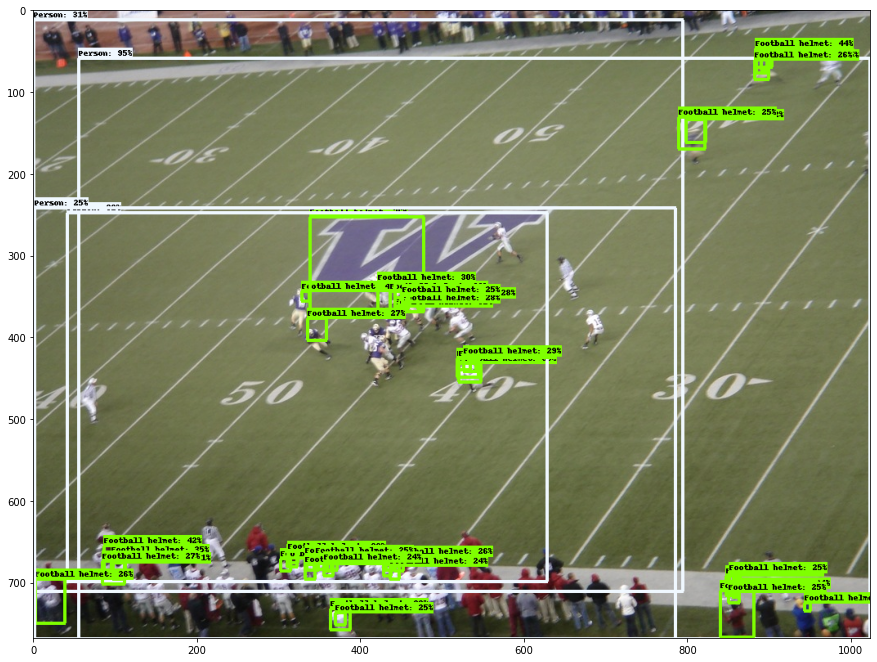

In [114]:
def show_img(img, detector, threshold=0.3):
    detector_output = detector(np.expand_dims(img, axis=0))
    detector_output = {key:value.numpy() for key,value in detector_output.items()}
    
    image_np_with_detections = img.copy()

    # Use keypoints if available in detections
    keypoints, keypoint_scores = None, None

    if 'detection_keypoints' in detector_output:
        keypoints = detector_output['detection_keypoints'][0]
        keypoint_scores = detector_output['detection_keypoint_scores'][0]

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detector_output['detection_boxes'][0],
          (detector_output['detection_classes'][0]+0).astype(int),
          detector_output['detection_scores'][0],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=50,
          min_score_thresh=threshold,
          agnostic_mode=False)
    
    plt.figure(figsize=(15,15))
    plt.imshow(image_np_with_detections)
    plt.show()
    
show_img(img, detect, threshold=0.1)

* **(k)** Tester votre modèles sur d'autres images

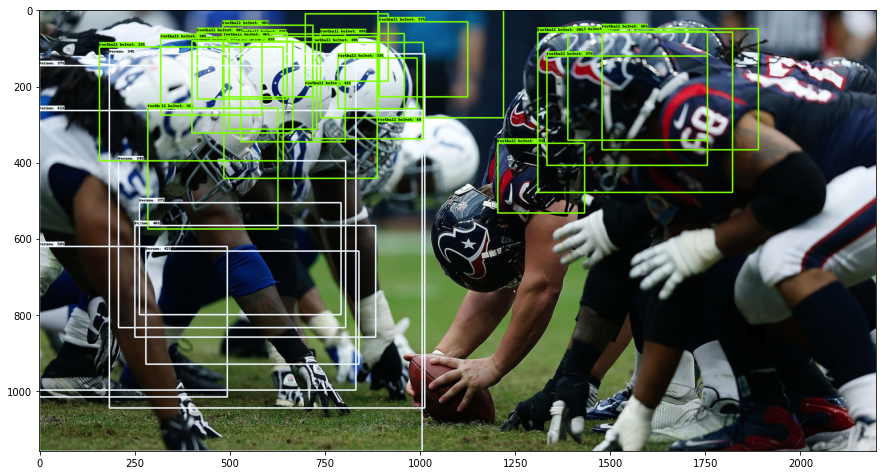

In [115]:
import cv2, urllib

def url_to_image(url):
    resp = urllib.request.urlopen(url) 
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, -1)
    img = img[..., [2,1,0]]
    return img

img2 = url_to_image("http://cdn.playbuzz.com/cdn/2361ba95-3be3-4f7d-b0a0-542155824490/495210c5-f896-41e2-8d27-3c093460c7a4.jpg")
show_img(img2, detect, threshold=0.3)

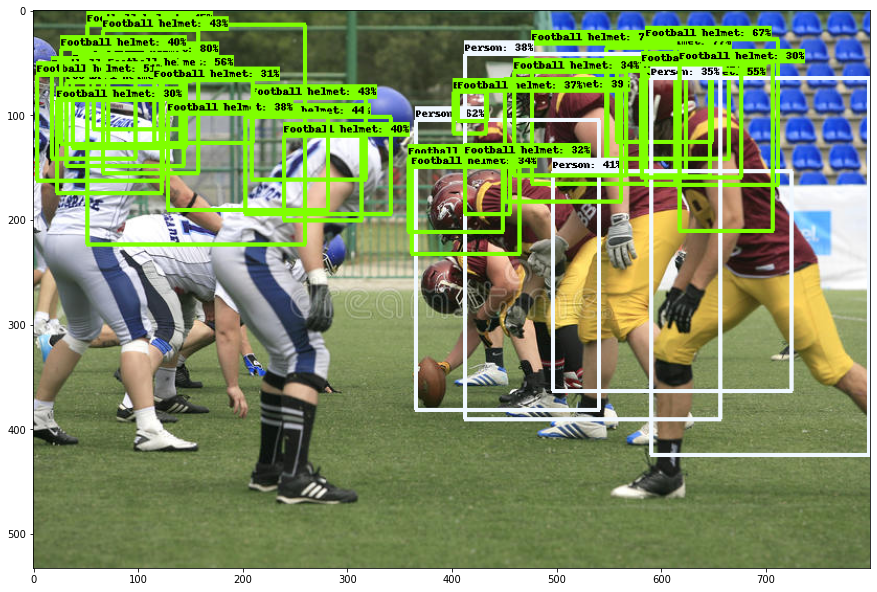

In [116]:
img2 = url_to_image("https://thumbs.dreamstime.com/b/american-football-match-wolves-blue-dragon-belgrade-serbia-may-belgrade-belgrade-team-winner-50415289.jpg")
show_img(img2, detect, threshold=0.3)

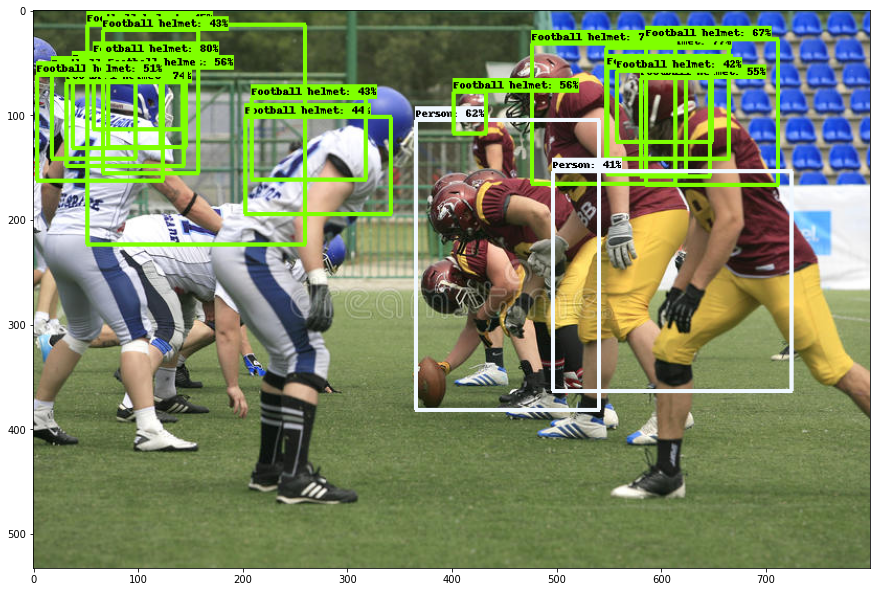

In [117]:
img2 = url_to_image("https://thumbs.dreamstime.com/b/american-football-match-wolves-blue-dragon-belgrade-serbia-may-belgrade-belgrade-team-winner-50415289.jpg")
show_img(img2, detect, threshold=0.4)

In [56]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
